In [3]:
# Step 1: Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Step 2: Load the Dataset
df = pd.read_csv("real_estate_survey_102_responses.csv")

In [7]:
# Step 3: Get the Features
print("Feature Columns in the Dataset:")
print(df.columns.tolist())

Feature Columns in the Dataset:
['Name', 'Email', 'Age', 'Location', 'Occupation', 'Bought_Sold', 'Budget', 'Prop_Type', 'Parking', 'CCTV', 'Gym', 'Transit', 'Price', 'Location_Pref', 'School', 'Builder', 'Source', 'Interest', 'Track', 'Challenge', 'Trust', 'Feature', 'Trend_Imp', 'Price_5yr']


In [9]:
# Step 4: Feature Selection
# Assuming the dataset has 21 columns (based on your CSV)
features = [
    'Age', 'Occupation', 'Bought_Sold', 'Budget', 'Prop_Type',
    'Parking', 'CCTV', 'Gym', 'Transit',
    'Price', 'Location_Pref', 'School', 'Builder',
    'Track', 'Challenge', 'Trust', 'Feature',
    'Trend_Imp', 'Price_5yr', 'Source'  # Make sure to include all columns
]

X = df[features]
y = df['Interest']  # Target: Buy, Sell, Rent, Invest


In [11]:
# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Step 6: Train Decision Tree Model
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [15]:
# Step 7: Evaluate Model
y_pred = clf.predict(X_test)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))

✅ Accuracy: 0.3333333333333333

📄 Classification Report:
               precision    recall  f1-score   support

           1       0.38      0.43      0.40         7
           2       0.33      0.33      0.33         6
           3       0.33      0.33      0.33         3
           4       0.25      0.20      0.22         5

    accuracy                           0.33        21
   macro avg       0.32      0.32      0.32        21
weighted avg       0.33      0.33      0.33        21



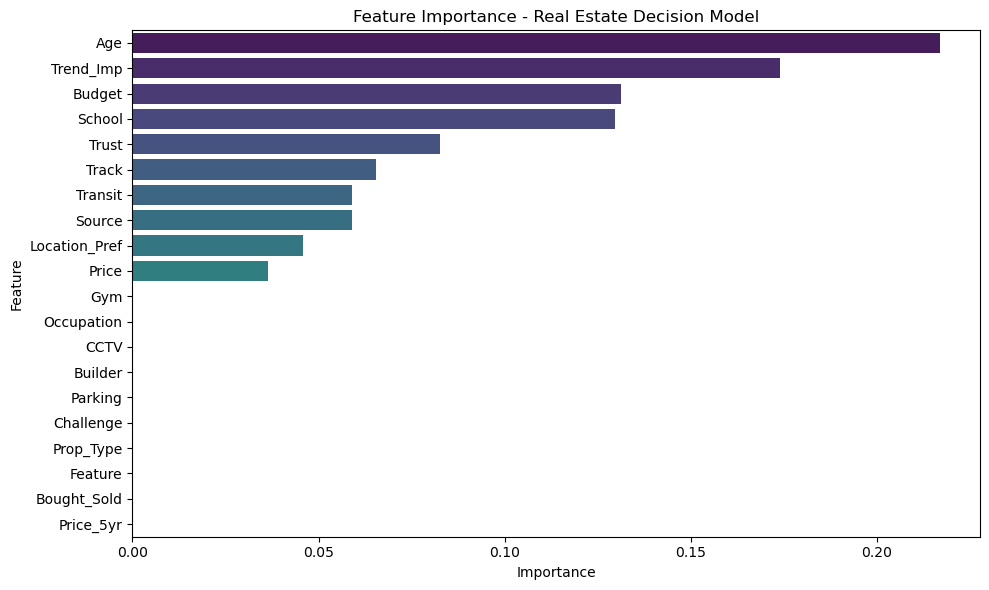

In [19]:
# Step 8: Feature Importance Plot
importances = clf.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')  # Corrected string for palette
plt.title('Feature Importance - Real Estate Decision Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [23]:
# Step 9: Predict on New Input (Sample)
sample_input = pd.DataFrame([[
    35,    # Age
    4,     # Occupation = Investor
    1,     # Bought_Sold = Yes
    5,     # Budget = >1Cr
    3,     # Property Type = Villa
    1, 1, 1, 1,  # Parking, CCTV, Gym, Transit
    1, 1, 1, 1,  # Price, Location_Pref, School, Builder
    1,     # Track = Weekly
    1,     # Challenge = High prices
    1,     # Trust = Yes
    1,     # Feature = Trends
    1,     # Trend_Imp = Very Important
    1,     # Price_5yr = Yes
    1      # Source ← add the last one
]], columns=features)


In [25]:
# Step 10: Make Prediction
predicted_class = clf.predict(sample_input)[0]
interest_map = {1: "Buying", 2: "Renting", 3: "Investing", 4: "Selling"}

print(f"\n🔍 Predicted Interest for New User: **{interest_map[predicted_class]}**")



🔍 Predicted Interest for New User: **Buying**
